In [1]:
import mediapipe as mp
import cv2
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_face = mp.solutions.face_detection
face= mp_face.FaceDetection(
    model_selection=0,
    min_detection_confidence=0.2
)
def detect_face(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face.process(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = image.shape
            x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 255), 2)
            cv2.putText(image, f'{int(detection.score[0] * 100)}%', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)

    return image
cap= cv2.VideoCapture(0)
while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Ignoring empty camera frame.")
        continue

    image = cv2.flip(image, 1)
    image = detect_face(image)

    cv2.imshow('MediaPipe Face Detection', image)

    if cv2.waitKey(5) & 0xFF == 27:  # Press 'Esc' to exit
        break
cap.release()
cv2.destroyAllWindows()
face.close()

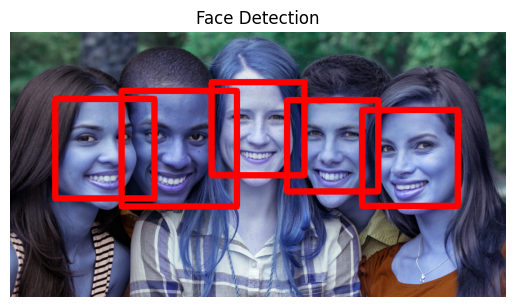

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread(r"C:\Users\HP\Downloads\face2image.png")
plt.imshow(img)
convert=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(convert)
face_cascade=cv2.CascadeClassifier(r"C:\Users\HP\Documents\cv\haarcascade_frontalface_default.xml")
face_cascade
imgrey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(imgrey,cmap='gray')
faces=face_cascade.detectMultiScale(imgrey,scaleFactor=1.1,minNeighbors=5,minSize=(30,30))
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
    cv2.imshow("face",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(img)
plt.axis('off')
plt.title("Face Detection")
plt.show()